In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import json

In [2]:
daily = pd.read_csv('daily.csv')

In [3]:
daily

,date,totalTested,tested,totalInfected,infected,totalRecovered,recovered,totalDeceased,deceased
0,2020-03-26,31127,4429,2022,259,10,2,9,3
1,2020-03-27,36374,5247,2395,373,11,1,9,0
2,2020-03-28,40700,4326,2657,262,11,0,11,2
3,2020-03-29,40700,0,2805,148,11,0,16,5
4,2020-03-30,43498,2798,2976,171,25,14,23,7
5,2020-03-31,48811,5313,3257,281,45,20,31,8
6,2020-04-01,55017,6206,3508,251,61,16,39,8
7,2020-04-02,60990,5973,3805,297,67,6,44,5
8,2020-04-03,67281,6291,4091,286,72,5,53,9
9,2020-04-04,74170,6889,4362,271,78,6,59,6


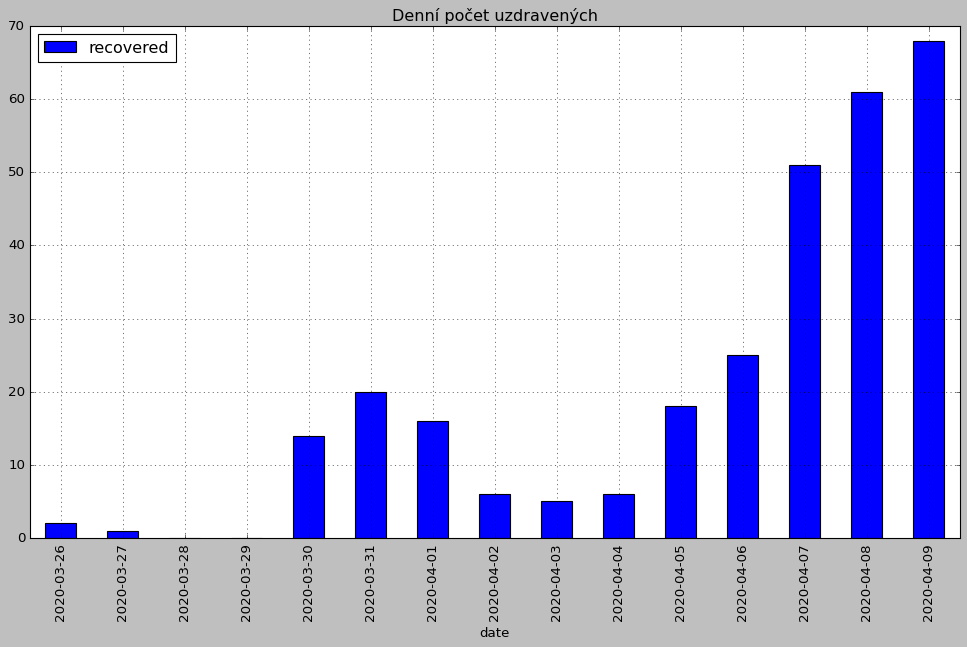

In [4]:
plt.style.use('classic')
daily.plot(x='date', 
            y='recovered', 
            kind='bar', 
            #style='r+-',
            figsize=(15, 8),
            grid=True, 
            title='Denní počet uzdravených')
plt.xticks(rotation=90)
plt.show()

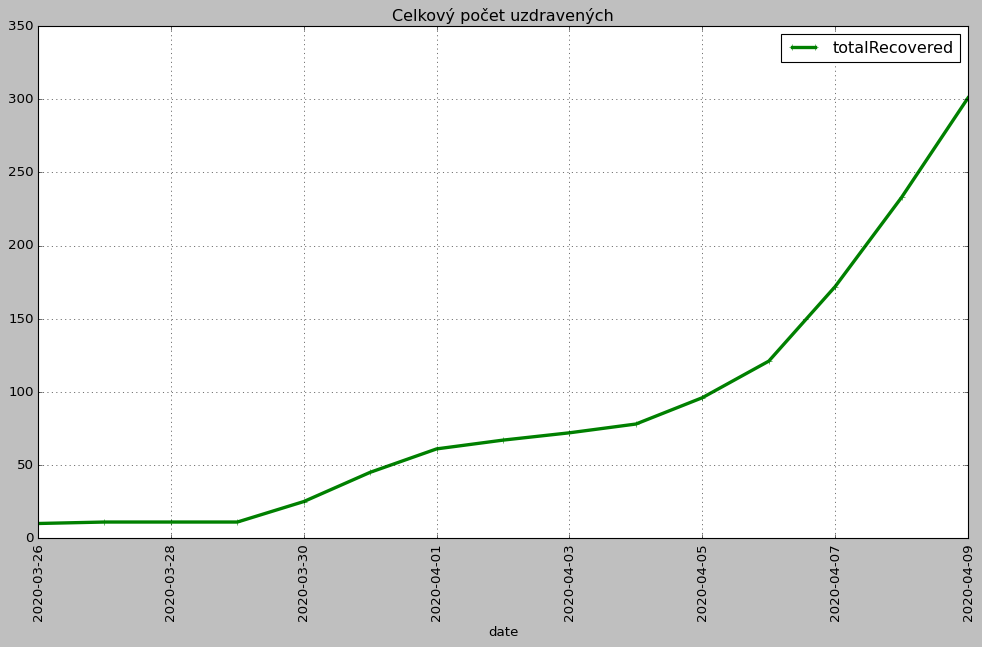

In [5]:
plt.style.use('classic')
daily.plot(x='date', 
            y='totalRecovered', 
            kind='line',
            linewidth=3,
            style='g+-',
            figsize=(15, 8),
            grid=True, 
            title='Celkový počet uzdravených')
plt.xticks(rotation=90)
plt.show()

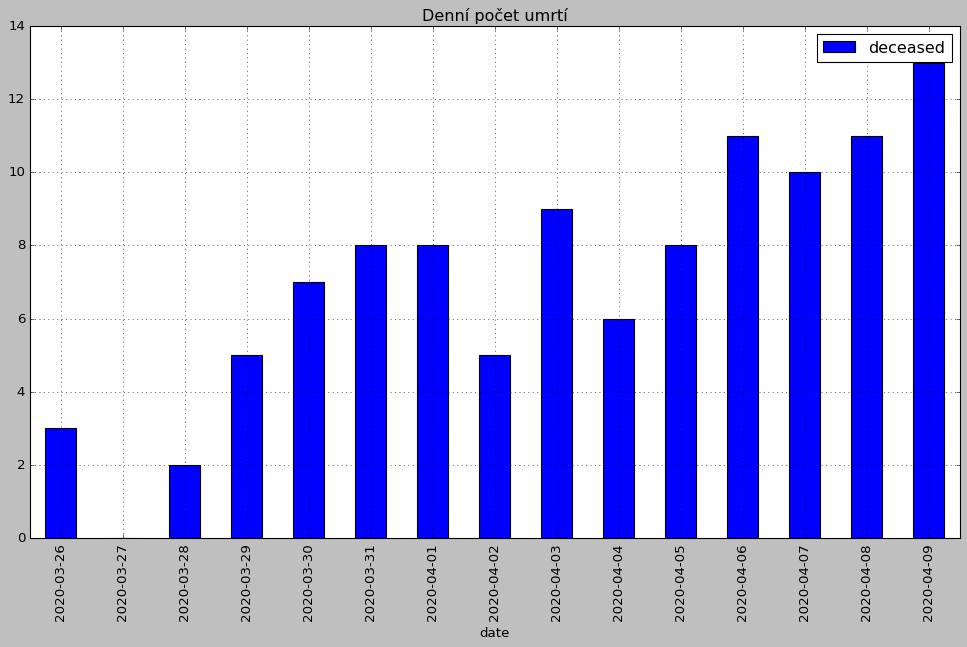

In [6]:
plt.style.use('classic')
daily.plot(x='date', 
            y='deceased', 
            kind='bar', 
            #style='r+-',
            figsize=(15, 8),
            grid=True, 
            title='Denní počet umrtí')
plt.xticks(rotation=90)
plt.show()

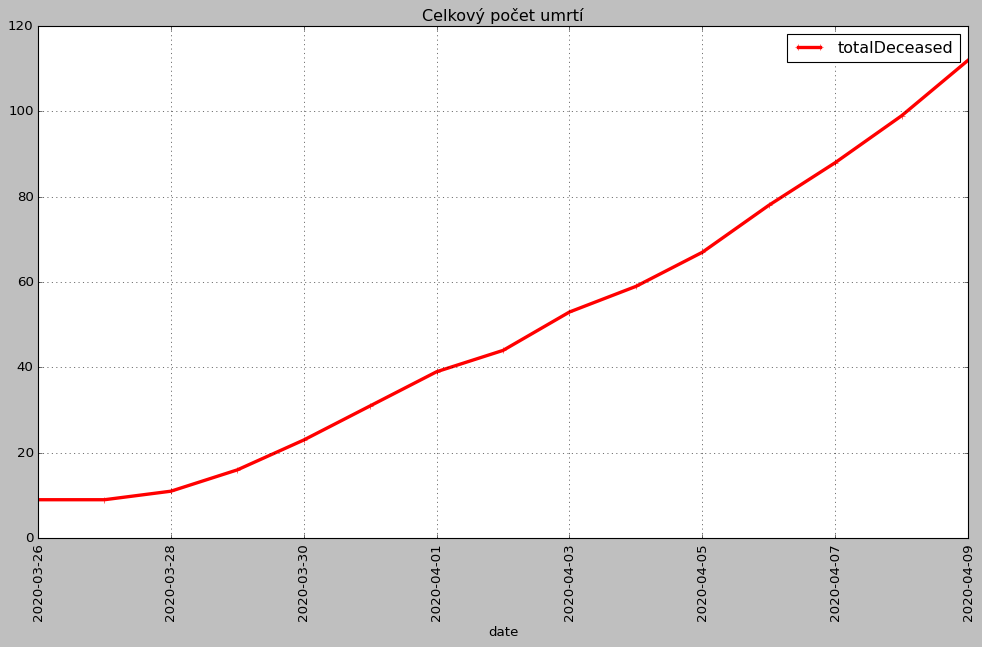

In [14]:
plt.style.use('classic')
daily.plot(x='date', 
            y='totalDeceased', 
            kind='line',
            linewidth=3,
            style='r+-',
            figsize=(15, 8),
            grid=True, 
            title='Celkový počet umrtí')
plt.xticks(rotation=90)
plt.show()

In [23]:
daily

,date,totalTested,tested,totalInfected,infected,totalRecovered,recovered,totalDeceased,deceased,active
0,2020-03-26,31127,4429,2022,259,10,2,9,3,2003
1,2020-03-27,36374,5247,2395,373,11,1,9,0,2375
2,2020-03-28,40700,4326,2657,262,11,0,11,2,2635
3,2020-03-29,40700,0,2805,148,11,0,16,5,2778
4,2020-03-30,43498,2798,2976,171,25,14,23,7,2928
5,2020-03-31,48811,5313,3257,281,45,20,31,8,3181
6,2020-04-01,55017,6206,3508,251,61,16,39,8,3408
7,2020-04-02,60990,5973,3805,297,67,6,44,5,3694
8,2020-04-03,67281,6291,4091,286,72,5,53,9,3966
9,2020-04-04,74170,6889,4362,271,78,6,59,6,4225


In [22]:
daily['active'] = daily['totalInfected'] - daily['totalRecovered'] - daily['totalDeceased'] 

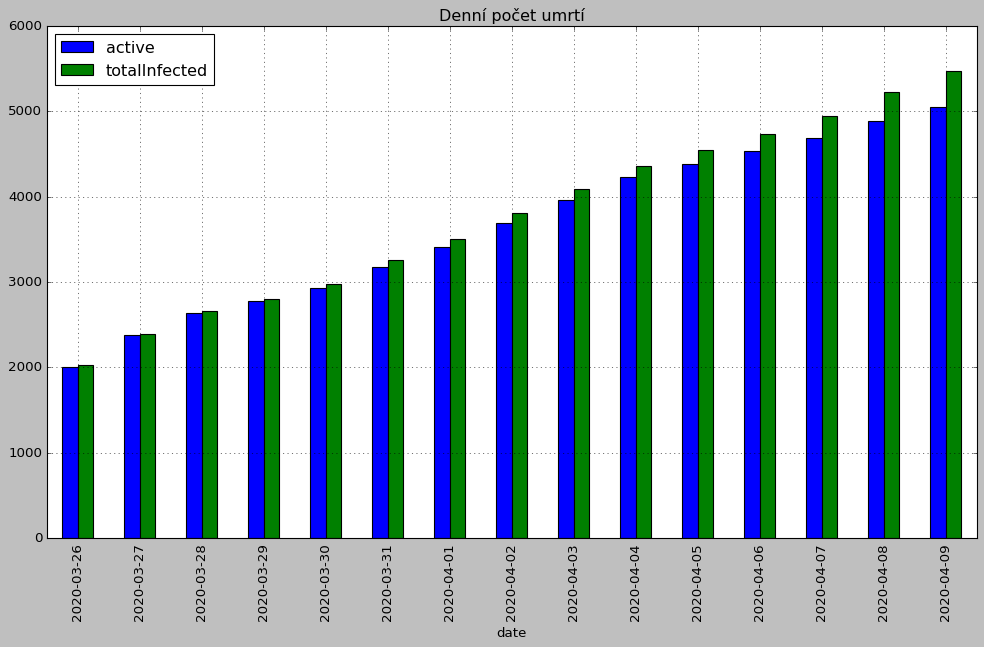

In [25]:
plt.style.use('classic')
daily.plot(x='date', 
            y=['active', 'totalInfected'], 
            kind='bar', 
            #style='r+-',
            figsize=(15, 8),
            grid=True, 
            title='Denní počet umrtí')
plt.xticks(rotation=90)
plt.show()